<!DOCTYPE html>
<html lang="fr">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Projet Data Visualisation</title>
    <style>
        body {
            font-family: Arial, sans-serif;
            margin: 20px;
            background-color: #f9f9f9;
            color: #333;
        }
        h1 {
            text-align: center;
            font-size: 3rem;
            color: #2c3e50;
            margin-bottom: 10px;
        }
        h2 {
            text-align: center;
            font-size: 2rem;
            color: #2980b9;
        }
        p {
            text-align: center;
            font-size: 1.2rem;
            margin: 10px auto;
            line-height: 1.6;
            color: black;
        }
        .container {
            width: 80%;
            margin: 50px auto;
            padding: 20px;
            background-color: #ffffff;
            border: 1px solid #dcdcdc;
            border-radius: 10px;
            box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
        }
        .highlight {
            font-weight: bold;
            color: #e74c3c;
        }
    </style>
</head>
<body>
    <div class="container">
        <h1>Projet Data Visualisation</h1>
        <h2>Cyril Kfouri, Mathias Robert, Maxime Maeder, Luc Renaud, Maxime Lambert</h2>
        <p><span class="highlight">Group 2 - Data and AI</span></p>
        <h2>Données Foncières</h2>
        <p><strong>Objectif:</strong> Solution pour un investisseur immobilier.</p>
    </div>
</body>
</html>


<h1 style="color: #e74c3c; text-align: left; margin-bottom: 50px;">1 - Nettoyage et préparation des données</h1>
<h2 style="text-align: center; margin-top: 20px; color: #3498db;">A - Découverte du DataFrame</h2>



In [1]:
import pandas as pd

import sys
import os
sys.path.append(os.path.abspath(os.path.join('..', 'classes')))
from correlation_analyze import CorrelationAnalyzer

In [2]:
data_2024 = '../CSV/données_foncières_france_2024_avant_nettoyage.csv'
data_2023 = '../CSV/2023.csv'
data_2022 = '../CSV/2022.csv'

In [3]:
df_2024 = pd.read_csv(data_2024, low_memory=False)
df_2023 = pd.read_csv(data_2023, low_memory=False)
df_2022 = pd.read_csv(data_2022, low_memory=False)

In [4]:
df_2024['Year'] = 2024
df_2023['Year'] = 2023
df_2022['Year'] = 2022

In [5]:
df = pd.concat([df_2024, df_2023, df_2022], ignore_index=True)

In [6]:
df.head()

,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,...,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude,Year
0,2024-1,2024-01-02,1,Vente,346.5,NaN,NaN,LE DELIVRE,B020,1230.0,...,NaN,NaN,P,prés,NaN,NaN,99.0,5.530952,45.952439,2024
1,2024-2,2024-01-03,2,Vente,10000.0,NaN,NaN,CHEVRY DESSOUS,B007,1170.0,...,NaN,NaN,S,sols,NaN,NaN,115.0,6.043339,46.282256,2024
2,2024-3,2024-01-08,1,Vente,249000.0,NaN,NaN,PIN HAMEAU,B086,1290.0,...,NaN,NaN,S,sols,NaN,NaN,497.0,4.911143,46.247235,2024
3,2024-4,2024-01-03,1,Vente,329500.0,29.0,NaN,PL DU JURA,0500,1170.0,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,6.058695,46.332212,2024
4,2024-4,2024-01-03,1,Vente,329500.0,29.0,NaN,PL DU JURA,0500,1170.0,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,6.058695,46.332212,2024


**On se rend compte qu'on a affaire a un très grand , dataset , il faudra traiter ce dataframe en le divisant en plusieurs pettis dataframe a theme pour mieux comprendre les données pour pouvoir les traité**

In [7]:
df.shape

(10033140, 41)

In [8]:
print(df.columns)

Index(['id_mutation', 'date_mutation', 'numero_disposition', 'nature_mutation',
       'valeur_fonciere', 'adresse_numero', 'adresse_suffixe',
       'adresse_nom_voie', 'adresse_code_voie', 'code_postal', 'code_commune',
       'nom_commune', 'code_departement', 'ancien_code_commune',
       'ancien_nom_commune', 'id_parcelle', 'ancien_id_parcelle',
       'numero_volume', 'lot1_numero', 'lot1_surface_carrez', 'lot2_numero',
       'lot2_surface_carrez', 'lot3_numero', 'lot3_surface_carrez',
       'lot4_numero', 'lot4_surface_carrez', 'lot5_numero',
       'lot5_surface_carrez', 'nombre_lots', 'code_type_local', 'type_local',
       'surface_reelle_bati', 'nombre_pieces_principales',
       'code_nature_culture', 'nature_culture', 'code_nature_culture_speciale',
       'nature_culture_speciale', 'surface_terrain', 'longitude', 'latitude',
       'Year'],
      dtype='object')


<h2 style="text-align: center; color: #3498db;">B - Division en plusieurs data frame pour meuilleur manipulation et compréhension des données</h2>

In [9]:
def split_dataframe(df):

    df_mutation = df[['id_mutation', 'date_mutation', 'numero_disposition', 'nature_mutation']]

    df_adresse = df[['adresse_numero', 'adresse_suffixe', 'adresse_nom_voie', 'adresse_code_voie',  'code_postal', 'code_commune', 'nom_commune', 'code_departement',
                      'ancien_code_commune', 'ancien_nom_commune']]
    
    df_parcelle_lot = df[['id_parcelle', 'ancien_id_parcelle', 'numero_volume', 'lot1_numero', 'lot1_surface_carrez', 'lot2_numero', 'lot2_surface_carrez', 'lot3_numero',
                           'lot3_surface_carrez', 'lot4_numero', 'lot4_surface_carrez', 'lot5_numero', 'lot5_surface_carrez', 'nombre_lots']]
    
    df_type_local = df[['code_type_local', 'type_local',  'surface_reelle_bati', 'surface_terrain', 'nombre_pieces_principales', 'code_nature_culture', 
                        'nature_culture', 'code_nature_culture_speciale', 'nature_culture_speciale']]
    
    df_coordonnees = df[['longitude', 'latitude']]

    df_financier = df[['valeur_fonciere']]

    return df_mutation, df_adresse, df_parcelle_lot, df_type_local, df_coordonnees, df_financier

In [10]:
df_mutation, df_adresse, df_parcelle_lot, df_type_local, df_coordonnees, df_financier = split_dataframe(df)

<h2 style="text-align: center; color: #3498db;">C - Traitement des Lignes (Suppréssion de lignes )</h2>

Il faut en tout premier verifier les lignes ou des informations importantes sont manquantes qui nous empecheraient de travailler correctment sur l'etude des pris

In [11]:
df_mutation.isna().sum()

id_mutation           0
date_mutation         0
numero_disposition    0
nature_mutation       0
dtype: int64

Apres une etude faite plus basse nous avons remarqué que le nom de comunne et le code departement sont les plus importants pour localiser une mutation donc les 2 ne possèdent pas de valeurs manquantes , on garde donc toutes les lignes

In [12]:
df_adresse.isna().sum()

adresse_numero          3740738
adresse_suffixe         9585062
adresse_nom_voie          71059
adresse_code_voie         70513
code_postal               71231
code_commune                  0
nom_commune                   0
code_departement              0
ancien_code_commune    10033011
ancien_nom_commune     10033011
dtype: int64

On ne garde que la france metropolitaine

In [13]:
df = df[df['code_departement'].astype(str).str.match(r'^([0-8]\d|9[0-5]|2[AB])$')]

Ici je vais supprimler toutes les lignes qui ne possèdent pas de coordonnées car les analyses ultérieure se feront avec des cartes, donc je ne pourrais pas afficher les mutations sans coordonées

In [14]:
df_coordonnees.isna().sum()

longitude    129263
latitude     129263
dtype: int64

In [15]:
df = df.dropna(subset=['longitude', 'latitude'], how='all')

Ici je vais supprimler toutes les lignes qui ne possèdent pas de données foncieres car le but est d'etudier les prix et si nous n'avons pas de données concernant les prix il est inutile de les garder

In [16]:
df_financier.isna().sum()

valeur_fonciere    82580
dtype: int64

In [17]:
df = df.dropna(subset=['valeur_fonciere'], how='all')

<h2 style="text-align: center; color: #3498db;">D - Traitement des Types de Colonnes</h2>

In [18]:
df_mutation['date_mutation'] = pd.to_datetime(df_mutation['date_mutation'], errors='coerce')
df_mutation['date_mutation'] = df_mutation['date_mutation'].apply(lambda x: x.replace(day=1) if pd.notnull(x) else x)

Ici j'ai drop du df directement pour réactulasier tous les data frame plus facilement avec la fonction créé précédement

In [19]:
df_mutation, df_adresse, df_parcelle_lot, df_type_local, df_coordonnees, df_financier = split_dataframe(df)

<h2 style="text-align: center; color: #3498db;">E - Suppréssion de Colonnes</h2>

Pour cela, on urtilise les fonction crées dans une classe pour afficher les corélations entre les entre les différentes colomnes, lorsque la corélation entre 2 colomnes est de 1, ca veut dire que on a 2 colomnes qui nous apporte exactement les memes precisions et donc ce n'est pas utile de garder les 2 pour l'etude

<h1 style="margin-top: 20px;">1 - DF Mutation</h1>

In [20]:
df_mutation

,id_mutation,date_mutation,numero_disposition,nature_mutation
0,2024-1,2024-01-02,1,Vente
1,2024-2,2024-01-03,2,Vente
2,2024-3,2024-01-08,1,Vente
3,2024-4,2024-01-03,1,Vente
4,2024-4,2024-01-03,1,Vente
...,...,...,...,...
10033135,2022-1686367,2022-02-15,1,Vente
10033136,2022-1686368,2022-05-17,1,Vente
10033137,2022-1686368,2022-05-17,1,Vente
10033138,2022-1686368,2022-05-17,1,Vente


In [21]:
df_mutation.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9722771 entries, 0 to 10033139
Data columns (total 4 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   id_mutation         object
 1   date_mutation       object
 2   numero_disposition  int64 
 3   nature_mutation     object
dtypes: int64(1), object(3)
memory usage: 370.9+ MB


Ici on remarque que toutes les colomnes vont etre essentilles puisque chacune nous apporte une information unique


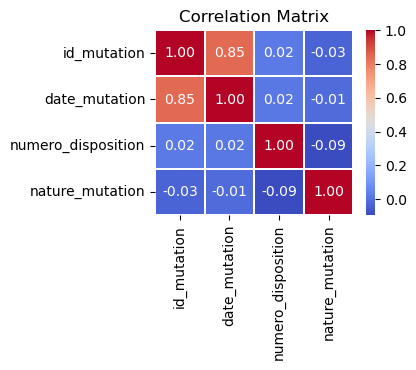

In [22]:
analyzer_mutation = CorrelationAnalyzer(df_mutation)
analyzer_mutation.plot_correlation_matrix()

On remarque ici que ce df ne possede aucune NULL value , on ne drop donc rien

In [23]:
df_mutation.isna().sum()

id_mutation           0
date_mutation         0
numero_disposition    0
nature_mutation       0
dtype: int64

<h1 style="margin-top: 100px;">2 - DF Adresse</h1>

In [24]:
df_adresse

,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,code_commune,nom_commune,code_departement,ancien_code_commune,ancien_nom_commune
0,NaN,NaN,LE DELIVRE,B020,1230.0,01076,Chaley,01,NaN,NaN
1,NaN,NaN,CHEVRY DESSOUS,B007,1170.0,01103,Chevry,01,NaN,NaN
2,NaN,NaN,PIN HAMEAU,B086,1290.0,01203,Laiz,01,NaN,NaN
3,29.0,NaN,PL DU JURA,0500,1170.0,01173,Gex,01,NaN,NaN
4,29.0,NaN,PL DU JURA,0500,1170.0,01173,Gex,01,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
10033135,2.0,NaN,RUE DE LA COMETE,2223,75007.0,75107,Paris 7e Arrondissement,75,NaN,NaN
10033136,9.0,B,RUE DE PASSY,7087,75016.0,75116,Paris 16e Arrondissement,75,NaN,NaN
10033137,9.0,B,RUE DE PASSY,7087,75016.0,75116,Paris 16e Arrondissement,75,NaN,NaN
10033138,9.0,B,RUE DE PASSY,7087,75016.0,75116,Paris 16e Arrondissement,75,NaN,NaN


On remarque que ici il y'a des corrélation = 1 qui ne sont pas sur la diagonale, ca veut dire que nous avons des infromations qui nous apporte le meme niveau de precision, il faut en drop une des 2 corréllé

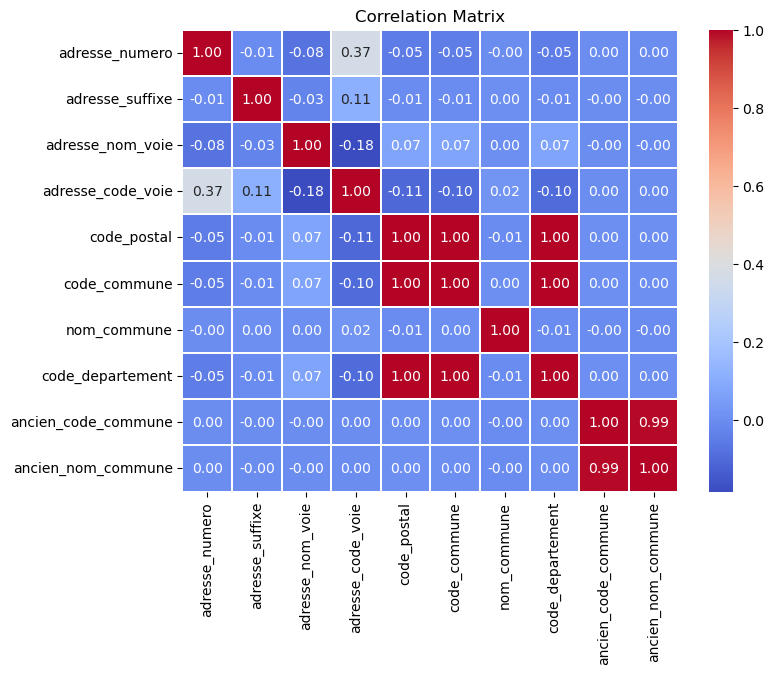

In [25]:
analyzer_adresse = CorrelationAnalyzer(df_adresse)
analyzer_adresse.plot_correlation_matrix()

In [26]:
analyzer_adresse.find_high_correlation_pairs()

Pairs of variables with correlation greater than 0.9:
code_departement and code_postal: 1.00
ancien_code_commune and ancien_nom_commune: 0.99
code_commune and code_postal: 1.00
code_commune and code_departement: 1.00


In [27]:
df_adresse.isna().sum()

adresse_numero         3608010
adresse_suffixe        9295664
adresse_nom_voie         67577
adresse_code_voie        67034
code_postal              67736
code_commune                 0
nom_commune                  0
code_departement             0
ancien_code_commune    9722644
ancien_nom_commune     9722644
dtype: int64

Ici je descide donc de uniquement pas drop le code du département ainsi que le nom de la commune qui fournissent toutes les infos que pourraient fournir le code postal ou le code commune en ce qui concerne les corélations. Je drop aussi ancien_code_commune  et ancien_nom_commune qui ne possèdent que des valeures nulles ainsi que adresse_suffixe qui possède beaucoup de valeures nulles

In [28]:
df_adresse = df_adresse.drop(['code_postal', 'ancien_nom_commune', 'code_commune', 'adresse_code_voie', 'adresse_suffixe', 'ancien_code_commune'], axis=1)

<h1 style="margin-top: 100px;">3 - DF Parcelle Lot</h1>

In [29]:
df_parcelle_lot 

,id_parcelle,ancien_id_parcelle,numero_volume,lot1_numero,lot1_surface_carrez,lot2_numero,lot2_surface_carrez,lot3_numero,lot3_surface_carrez,lot4_numero,lot4_surface_carrez,lot5_numero,lot5_surface_carrez,nombre_lots
0,010760000B0514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,011030000B1782,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,012030000C1065,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,01173000AI0551,NaN,NaN,175,NaN,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
4,01173000AI0551,NaN,NaN,175,NaN,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10033135,75107000BZ0063,NaN,NaN,28,NaN,6,34.26,NaN,NaN,NaN,NaN,NaN,NaN,2
10033136,75116000CH0054,NaN,NaN,5,194.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
10033137,75116000CH0054,NaN,NaN,5,194.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
10033138,75116000CH0054,NaN,NaN,5,194.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


Ici la plusieurs collomnes sont nuls , on pourrait etre tenté de les supprimer, c'est pour cela on verifie leur corélation avec le prix

In [30]:
df_parcelle_lot.isna().sum()

id_parcelle                  0
ancien_id_parcelle     9722770
numero_volume          9701530
lot1_numero            6624888
lot1_surface_carrez    8841400
lot2_numero            8753731
lot2_surface_carrez    9426613
lot3_numero            9550556
lot3_surface_carrez    9689631
lot4_numero            9668144
lot4_surface_carrez    9714861
lot5_numero            9699715
lot5_surface_carrez    9720044
nombre_lots                  0
dtype: int64

On remarque que sur toutes les colomnes du data frame ce sont celles la qui ont la plujs grande influance sur le prix , on ne peut donc pas du tout supprimer ces colomnes

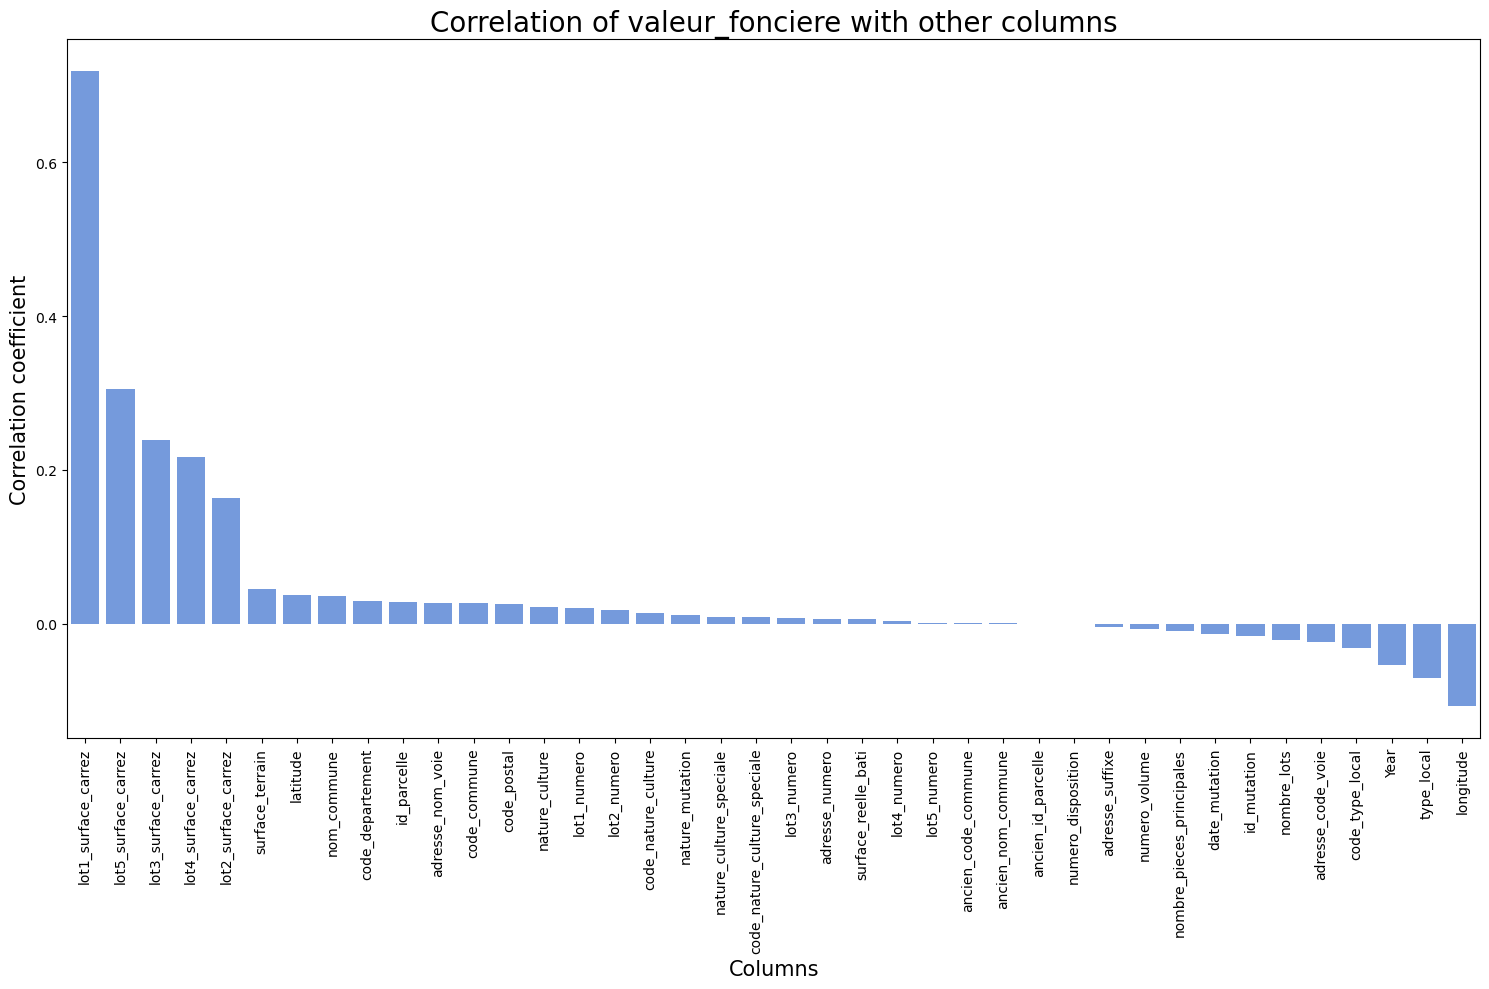

In [31]:
analyzer_df = CorrelationAnalyzer(df)
analyzer_df.plot_correlation_with_column('valeur_fonciere')

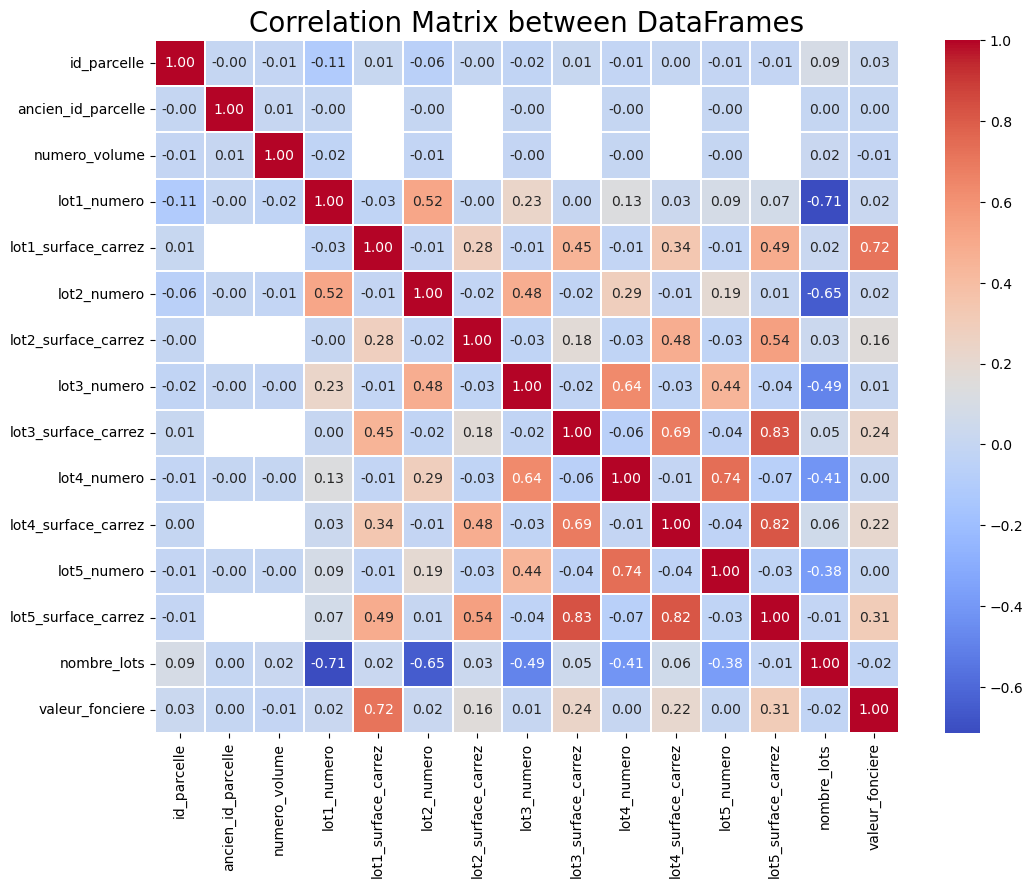

In [32]:
analyzer_parcelle_lot = CorrelationAnalyzer(df_parcelle_lot)
analyzer_parcelle_lot .plot_correlation_between_dfs(df_financier)

Ici on remarque que numero volume est pas utile au vu du manque d'information et sa non corélation au prix, on peut  donc le drop

Je drop aussi le nombre de lots comme il est completement correlé a l'ensemble des numéros de lots et n'est pas directmeent corélé au prix par rpport aux autres, il n'apporte donc aucune information pertinante

In [33]:
df_parcelle_lot = df_parcelle_lot.drop(['id_parcelle','ancien_id_parcelle', 'numero_volume'], axis=1)

In [34]:
df_parcelle_lot

,lot1_numero,lot1_surface_carrez,lot2_numero,lot2_surface_carrez,lot3_numero,lot3_surface_carrez,lot4_numero,lot4_surface_carrez,lot5_numero,lot5_surface_carrez,nombre_lots
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,175,NaN,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
4,175,NaN,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...
10033135,28,NaN,6,34.26,NaN,NaN,NaN,NaN,NaN,NaN,2
10033136,5,194.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
10033137,5,194.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
10033138,5,194.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


<h1 style="margin-top: 100px;">4 - DF Type Local</h1>

In [35]:
df_type_local

,code_type_local,type_local,surface_reelle_bati,surface_terrain,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale
0,NaN,NaN,NaN,99.0,NaN,P,prés,NaN,NaN
1,NaN,NaN,NaN,115.0,NaN,S,sols,NaN,NaN
2,NaN,NaN,NaN,497.0,NaN,S,sols,NaN,NaN
3,3.0,Dépendance,NaN,NaN,0.0,NaN,NaN,NaN,NaN
4,3.0,Dépendance,NaN,NaN,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
10033135,3.0,Dépendance,NaN,NaN,0.0,NaN,NaN,NaN,NaN
10033136,2.0,Appartement,69.0,NaN,2.0,NaN,NaN,NaN,NaN
10033137,4.0,Local industriel. commercial ou assimilé,138.0,NaN,0.0,NaN,NaN,NaN,NaN
10033138,3.0,Dépendance,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [36]:
df_type_local.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9722771 entries, 0 to 10033139
Data columns (total 9 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   code_type_local               float64
 1   type_local                    object 
 2   surface_reelle_bati           float64
 3   surface_terrain               float64
 4   nombre_pieces_principales     float64
 5   code_nature_culture           object 
 6   nature_culture                object 
 7   code_nature_culture_speciale  object 
 8   nature_culture_speciale       object 
dtypes: float64(4), object(5)
memory usage: 741.8+ MB


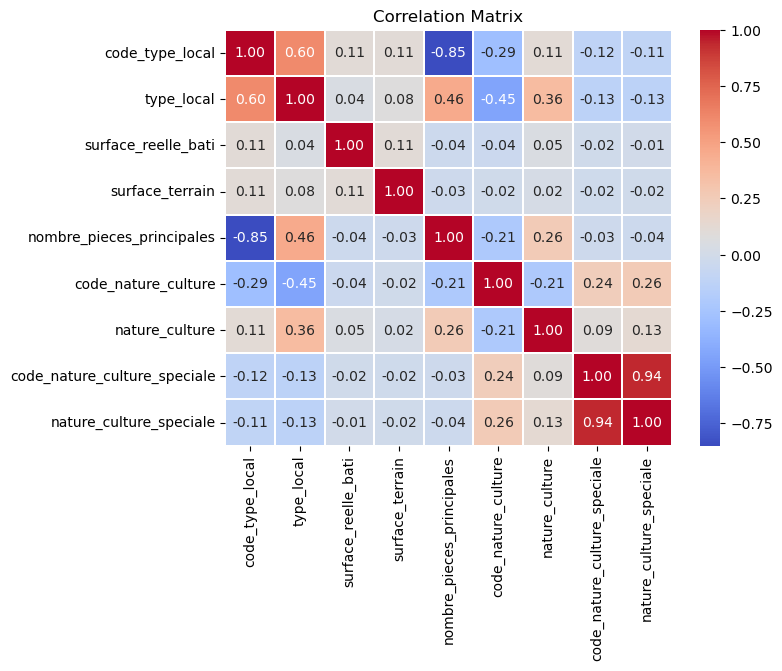

In [37]:
analyzer_type_local = CorrelationAnalyzer(df_type_local)
analyzer_type_local.plot_correlation_matrix()

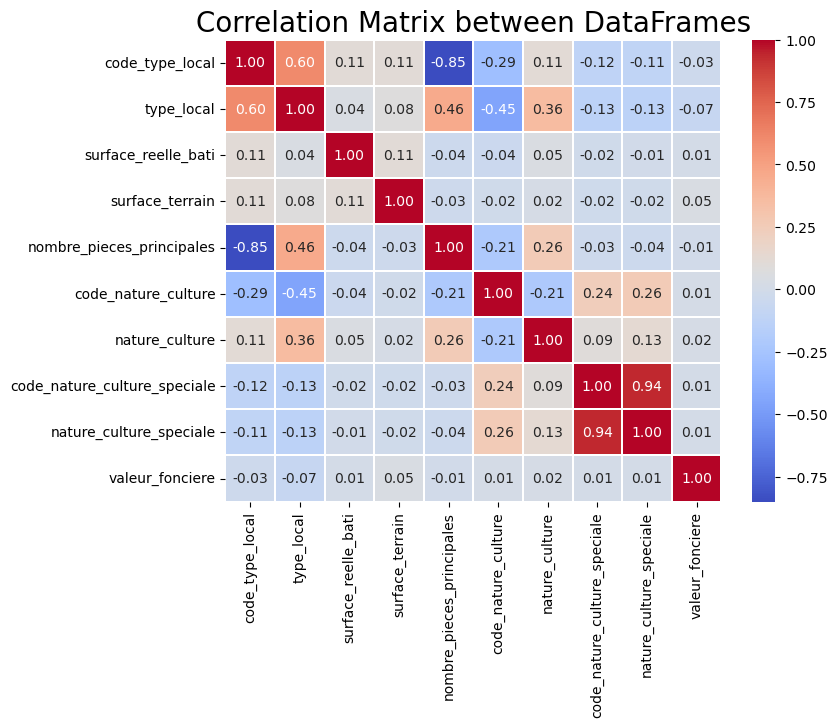

In [38]:
analyzer_type_local.plot_correlation_between_dfs(df_financier)

In [39]:
df_type_local = df_type_local.drop(['code_nature_culture_speciale', 'code_type_local', 'code_nature_culture'], axis=1)

On concatene le dataset 

In [40]:
new_df = pd.concat([df_mutation, df_adresse, df_parcelle_lot, df_type_local, df_coordonnees, df_financier], axis=1, ignore_index=False)


<h2 style="text-align: center; color: #3498db;">F - Traitement des Valeurs NULL </h2>

<h1 style="margin-top: 20px;">1 - Lots</h1>

In [41]:
lots = df['lot1_numero'].notnull() | df['lot2_numero'].notnull() | df['lot3_numero'].notnull() | df['lot4_numero'].notnull() | df['lot5_numero'].notnull()

In [42]:
df_lots = df[lots]
df_lots.shape

(3097883, 41)

Lorsque le lot a existe, le lot a-1 exsite toujours

In [43]:
df_lots['lot2_numero'].isnull().sum()
df_lots_filtre = df_lots[df_lots['lot3_numero'].notnull()]
nb_lot2_numero_null = df_lots_filtre['lot2_numero'].isnull().sum()
nb_lot2_numero_null

0

In [44]:
new_df['surface_tot_lots'] = new_df[['lot1_surface_carrez', 'lot2_surface_carrez', 'lot3_surface_carrez', 'lot4_surface_carrez', 'lot5_surface_carrez']].sum(axis=1)

In [45]:
new_df = new_df.drop(['lot1_surface_carrez', 'lot2_surface_carrez', 'lot3_surface_carrez', 'lot4_surface_carrez', 'lot5_surface_carrez','lot1_numero', 'lot2_numero', 'lot3_numero', 'lot4_numero', 'lot5_numero'], axis=1)

<h1 style="margin-top: 50px;">2 - Type Local NULL</h1>

In [46]:
new_df['type_local'].isnull().sum()

4003318

In [47]:
terres_agricoles = ['terres', 'terres plantées', 'vergers', 'vignes', 'pacages', 
                    'prés', 'prés d\'embouche', 'prés plantes', 'pâtures', 'sols']

terrains = ['bois', 'carrières', 'chemin de fer', 'futaies feuillues', 'futaies mixtes', 
            'futaies résineuses', 'herbages', 'jardins', 'landes', 'landes boisées', 
            'oseraies', 'peupleraies', 'taillis simples', 'taillis sous futaie']

terrains_a_batir = ['terrains a bâtir', 'terrains d\'agrément']

def assigner_type_local(row):
    if pd.isna(row['type_local']):
        if row['nature_culture'] in terres_agricoles:
            return 'Terre Agricole'  
        elif row['nature_culture'] in terrains:
            return 'Terrain Naturel'  
        elif row['nature_culture'] in terrains_a_batir:
            return 'Terrain à Bâtir' 
    return row['type_local']  

new_df['type_local'] = new_df.apply(assigner_type_local, axis=1)

<h2 style="text-align: center; color: #3498db;">G - Mutage des lignes et ajout de colomnes </h2>

In [48]:
dependances = df[df['type_local'] == 'Dépendance']
autres_types = df[df['type_local'] != 'Dépendance']

In [49]:
fusion = autres_types.merge(dependances, on=['valeur_fonciere', 'adresse_nom_voie'])
nombre_dependances = fusion.groupby(['valeur_fonciere', 'adresse_nom_voie']).size().reset_index(name='nombre_dependances')
new_df = new_df.merge(nombre_dependances, on=['valeur_fonciere', 'adresse_nom_voie'], how='left')
new_df['nombre_dependances'] = new_df['nombre_dependances'].fillna(0).astype(int)
new_df = new_df[new_df['type_local'] != 'Dépendance']

In [50]:
def calcul_prix_m2(row):
    if row['type_local'] in ['Terre Agricole', 'Terrain Naturel', 'Terrain à Bâtir']:
        return row['valeur_fonciere'] / row['surface_terrain']
    if row['surface_reelle_bati'] > 0:
        return row['valeur_fonciere'] / row['surface_reelle_bati']

new_df['prix_m2'] = new_df.apply(calcul_prix_m2, axis=1)

new_df = new_df[(new_df['prix_m2'] != 0) & (new_df['prix_m2'].notna())]



<h2 style="text-align: center; color: #3498db;">H - Création du DataFrame et Export du CSV</h2>

In [51]:
new_df

,id_mutation,date_mutation,numero_disposition,nature_mutation,adresse_numero,adresse_nom_voie,nom_commune,code_departement,nombre_lots,type_local,...,surface_terrain,nombre_pieces_principales,nature_culture,nature_culture_speciale,longitude,latitude,valeur_fonciere,surface_tot_lots,nombre_dependances,prix_m2
0,2024-1,2024-01-02,1,Vente,NaN,LE DELIVRE,Chaley,01,0,Terre Agricole,...,99.0,NaN,prés,NaN,5.530952,45.952439,346.5,0.00,0,3.500000
1,2024-2,2024-01-03,2,Vente,NaN,CHEVRY DESSOUS,Chevry,01,0,Terre Agricole,...,115.0,NaN,sols,NaN,6.043339,46.282256,10000.0,0.00,0,86.956522
2,2024-3,2024-01-08,1,Vente,NaN,PIN HAMEAU,Laiz,01,0,Terre Agricole,...,497.0,NaN,sols,NaN,4.911143,46.247235,249000.0,0.00,0,501.006036
6,2024-4,2024-01-03,1,Vente,29.0,PL DU JURA,Gex,01,2,Appartement,...,NaN,4.0,NaN,NaN,6.058695,46.332212,329500.0,0.00,3,3702.247191
7,2024-5,2024-01-09,1,Vente,NaN,AU CHAUME,Plateau d'Hauteville,01,0,Terrain Naturel,...,1584.0,NaN,futaies résineuses,NaN,5.548635,45.900606,20000.0,0.00,0,12.626263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9722763,2022-1686365,2022-07-12,1,Vente,15.0,RUE DU DOCTEUR GOUJON,Paris 12e Arrondissement,75,1,Appartement,...,NaN,1.0,NaN,NaN,2.398414,48.840437,110000.0,15.39,0,6875.000000
9722764,2022-1686366,2022-11-02,1,Vente,6.0,RUE MERCOEUR,Paris 11e Arrondissement,75,1,Appartement,...,NaN,1.0,NaN,NaN,2.383618,48.856909,220000.0,19.01,0,10000.000000
9722765,2022-1686367,2022-02-15,1,Vente,2.0,RUE DE LA COMETE,Paris 7e Arrondissement,75,2,Appartement,...,NaN,1.0,NaN,NaN,2.308733,48.859685,505000.0,34.26,4,15303.030303
9722767,2022-1686368,2022-05-17,1,Vente,9.0,RUE DE PASSY,Paris 16e Arrondissement,75,1,Appartement,...,NaN,2.0,NaN,NaN,2.283528,48.858099,2100000.0,194.28,4,30434.782609


In [52]:
new_df.to_csv('../CSV/données_foncières_france_2024.csv', index=False)